In [11]:
import glob
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
filename_base="xp1_migr_20180620174820" # 
df = None
files = glob.glob("./results/{0}/*.csv".format(filename_base))
print (files)
for f in files:
    #print (f)
    filename=os.path.basename(f)
    name = filename.split(".")[0].split("_")
    if ("_migr_" in filename):
        df_migr = pd.read_csv(f)

df = df_migr

['./results/xp1_migr_20180620174820/xp1_migr_20180620174820_migr_5.csv']


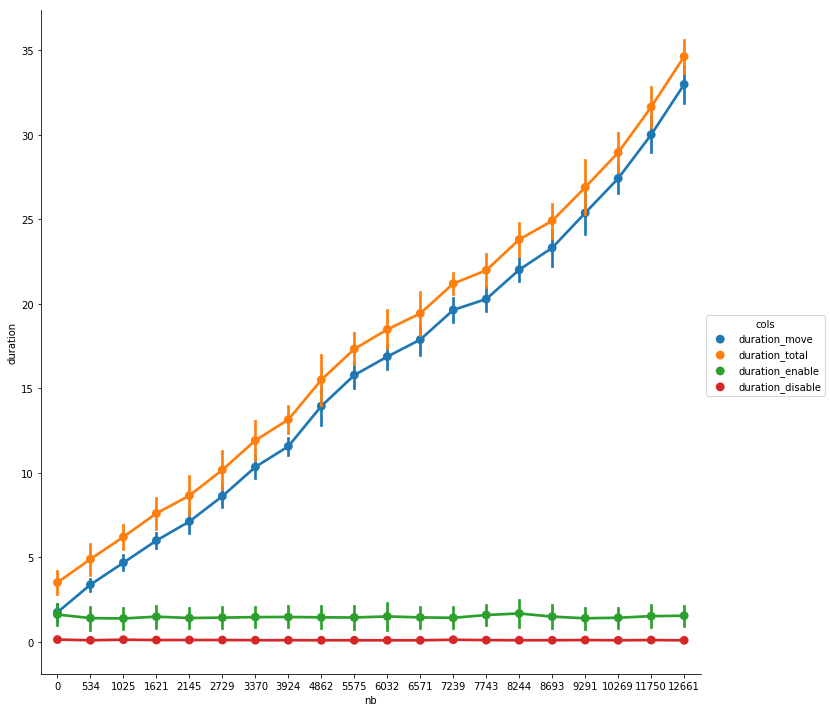

<Figure size 432x288 with 0 Axes>

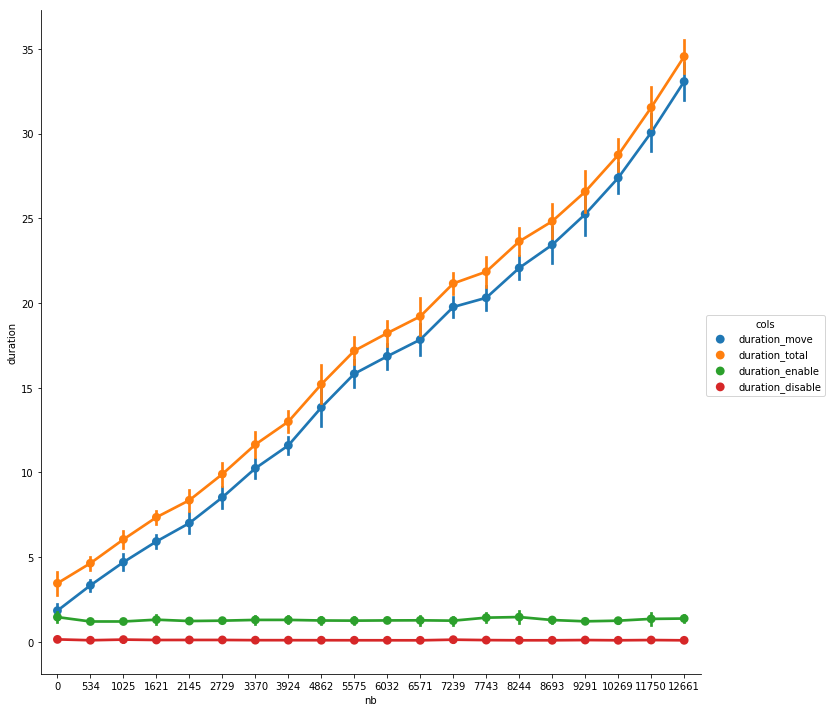

In [18]:
df["index_launch"] = df.groupby("nb").cumcount()
#df.groupby("nb").mean().plot()
df_nofirst = df[df["index_launch"]>0]
d = df[["nb","duration_move", "duration_total", "duration_enable", "duration_disable"]].melt('nb', var_name='cols',  value_name='duration')
sns.factorplot(x="nb", y="duration", hue="cols", data=d,size=10, kind="point",ci="sd")
plt.figure()
d = df_nofirst[["nb","duration_move", "duration_total", "duration_enable", "duration_disable"]].melt('nb', var_name='cols',  value_name='duration')
sns.factorplot(x="nb", y="duration", hue="cols", data=d,size=10, kind="point",ci="sd")

### Desactivation & activation duration + first activation vs the rest
First tenant activation is always longer, desactivation stable

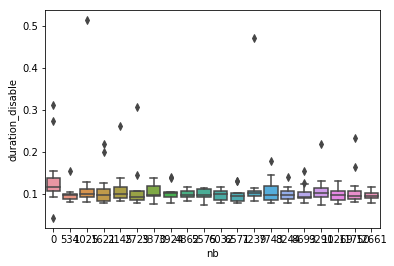

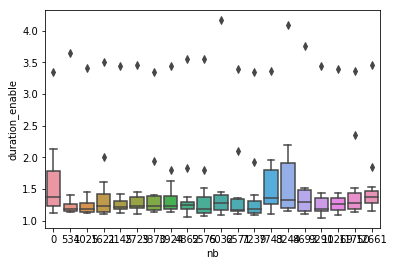

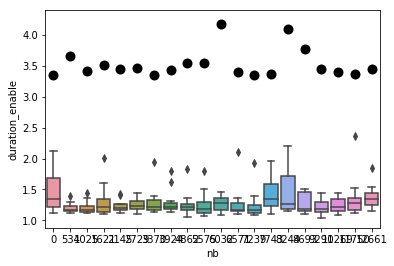

In [19]:


sns.boxplot(x="nb", y="duration_disable", data=df)
plt.figure()
sns.boxplot(x="nb", y="duration_enable", data=df)
plt.figure()


#df[df["index_launch"]>0].boxplot(by="nb", column="duration_enable")
sns.boxplot(x="nb", y="duration_enable", data=df[df["index_launch"]>0])
ini_df = df[df["index_launch"]==0]
x = ini_df["nb"]
y = ini_df["duration_enable"]

sns.stripplot(x="nb", y="duration_enable",data=ini_df, size=10, color="black", edgecolor="gray")


#df.groupby("index_launch").mean().plot(y=["duration_enable", "duration_disable"])

### Boxplot by activation/desactivation number
First activation is always longer

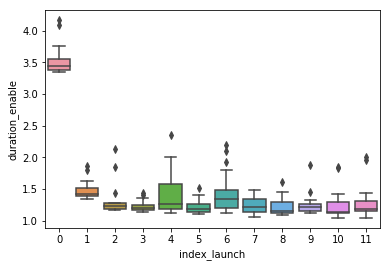

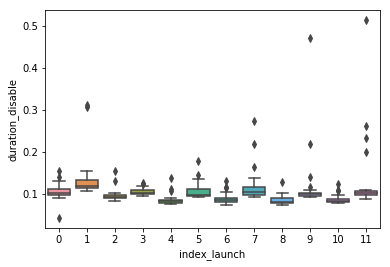

In [20]:

plt.figure()
sns.boxplot(x="index_launch", y="duration_enable", data=df)
plt.figure()
sns.boxplot(x="index_launch", y="duration_disable", data=df)